# Lab 2.7

In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def PS(x, divisor):
    """Takes in a complex array and outputs a plot of frequency versus power spectrum."""

    Vsamp = 62.5/divisor
    N = 16000
    
    a = x[:len(x)/2]
    b = x[len(x)/2:]
    c = a + b * 1j

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    f,fx = ugradio.dft.dft(c[:N],t=time, vsamp=Vsamp)
    P = np.abs(fx)**2
    plt.plot(f,P)
    plt.xlabel("Frequency")
    plt.ylabel("Power [volt-second^2]")
    plt.show()

## Average

LO for upper baseband: 1231 MHz

LO for lower baseband: 1229 MHz

Power of LO: 13 dBm

x = ugradio.pico.capture_data('50mV', divisor=8, dual_mode=True, nsamples=16000, nblocks=1000)

np.save('upper_block_10', x)

Took data 10 times resulting in 10,000 blocks. Repeated for lower.

In [24]:
# take average power spectrum of nblocks = 1000



## Line Shape

In [ ]:
s_line = s_on/s_off

## Line Intensity

In [7]:
T_cold = 3 # K
T_cal = 300 # K

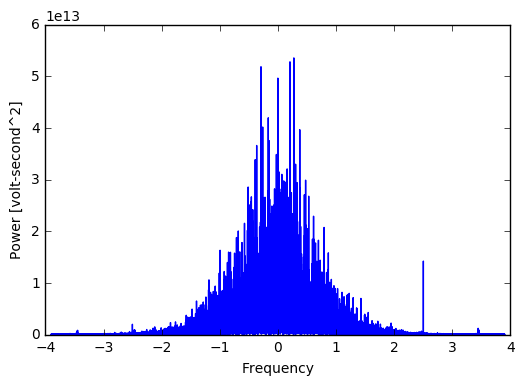

In [10]:
cold = np.loadtxt('sCold-2-24-19.txt')
PS(cold, 8)

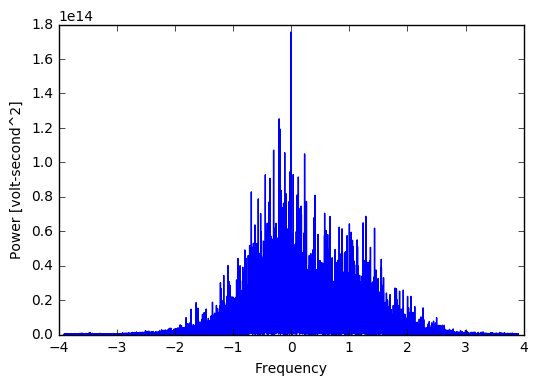

In [11]:
cal = np.loadtxt('sPerson-2-24-19.txt')
PS(cal, 8)

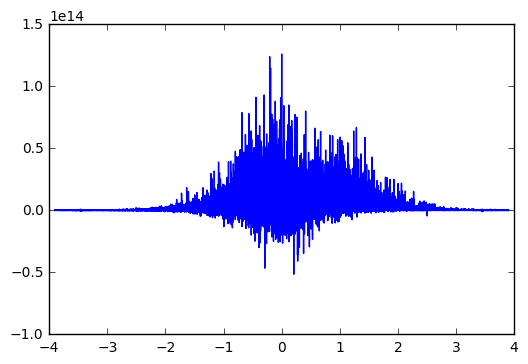

In [12]:
Vsamp = 62.5/8
N = 16000
time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)

cold = np.loadtxt('sCold-2-24-19.txt')
a_cold = cold[:len(cold)/2]
b_cold = cold[len(cold)/2:]
c_cold = a_cold + b_cold * 1j
f,fx = ugradio.dft.dft(c_cold[:N],t=time, vsamp=Vsamp)
P_cold = np.abs(fx)**2

cal = np.loadtxt('sPerson-2-24-19.txt')
a_cal = cal[:len(cal)/2]
b_cal = cal[len(cal)/2:]
c_cal = a_cal + b_cal * 1j
f,fx = ugradio.dft.dft(c_cal[:N],t=time, vsamp=Vsamp)
P_cal = np.abs(fx)**2

plt.plot(f, P_cal-P_cold)
plt.show()

In [13]:
# obtain gain

G = (T_cal - T_cold)/(np.sum(P_cal - P_cold)) * np.sum(P_cold)
print(G)

126.34495924


In [ ]:
T_line = s_line * G

## Plot Intensity vs. Frequency -- and Velocity

In [ ]:
# Doppler velocity

c = 299792.458 #km/s
f =
f_0 =
v = c * (f/f_0) # km/s

## Reference Frame

ugradio.doppler.get_projected_velocity(ra, dec, jd, obs_lat=37.873199, obs_lon=-122.257063, obs_alt=120.0, epoch=2451545.0)

get_projected_velocity(ra, dec, jd, obs_lat=nch.lat, obs_lon=nch.lon, 
        obs_alt=nch.alt, epoch=2451545.):
    '''Compute the projected velocity of the telescope wrt the 
    Local Standard of Rest.
    Parameters
    ----------
    ra, dec : float degrees, the RA/DEC of target
    jd      : float, julian date (UTC) of the observation
    obs_lat : float degrees, latitude of observatory, default=nch.lat
    obs_lon : float degrees, longitude of observatory, default=nch.lon
    obs_alt : float meters, altitude of observatory, default=nch.alt
    epoch   : float, julian date epoch of ra/dec coordinates
              default=2451545 is J2000

    Returns
    -------
    v : float m/s, barycenter-corrected radial velocity,
        see (Wright & Eastman, 2014) '''

In [23]:
lat = 37.873199 # for Campbell Hall

jd = 2458539.451389 # 22:50:00 UTC (14:50:00 PST), 2/24/2019
lst = ugradio.timing.lst(jd)

v = ugradio.doppler.get_projected_velocity(ra=lst, dec=lat, jd=jd) 
print(v)

[-16861.65812534]
